Column names in the dataset: ['Site Name', 'Date', 'County', 'Event/Site Captain Name', 'Total # of VOLUNTEERS', 'Total # of TRASH BAGS filled', 'Total WEIGHT of trash collected', 'Cigarette Butts', 'Food Wrappers', 'Take Out Containers (Plastic)', 'Take out containers (Foam)', 'Bottle Caps (plastic)', 'Bottle Caps (metal)', 'Lids (plastic)', 'Straws/Stirrers', 'Forks, Knives, Spoons', 'Beverage Bottles (Plastic)', 'Beverage Bottles (Glass)', 'Beverage Cans', 'Grocery Bags (Plastic)', 'Other plastic bags', 'Paper Bags', 'Cups & plates (paper)', 'Cups & plates (plastic)', 'Cups & plates (foam)', 'Fishing buoys, pots, and traps', 'Fishing Net & pieces', 'Fishing line (1 yard = 1 piece)', 'Rope (1 yard = 1 piece)', '6-pack holders', 'Other plastic/foam packaging', 'Other plastic bottles (oil, bleach, etc.)', 'Strapping bands', 'Tobacco Packaging/Wrap', 'Appliances (refrig, washer, etc.)', 'Balloons', 'Cigar Tips', 'Cigarette Lighters', 'e-Cigarette Waste', 'Construction Materials', 'Firew

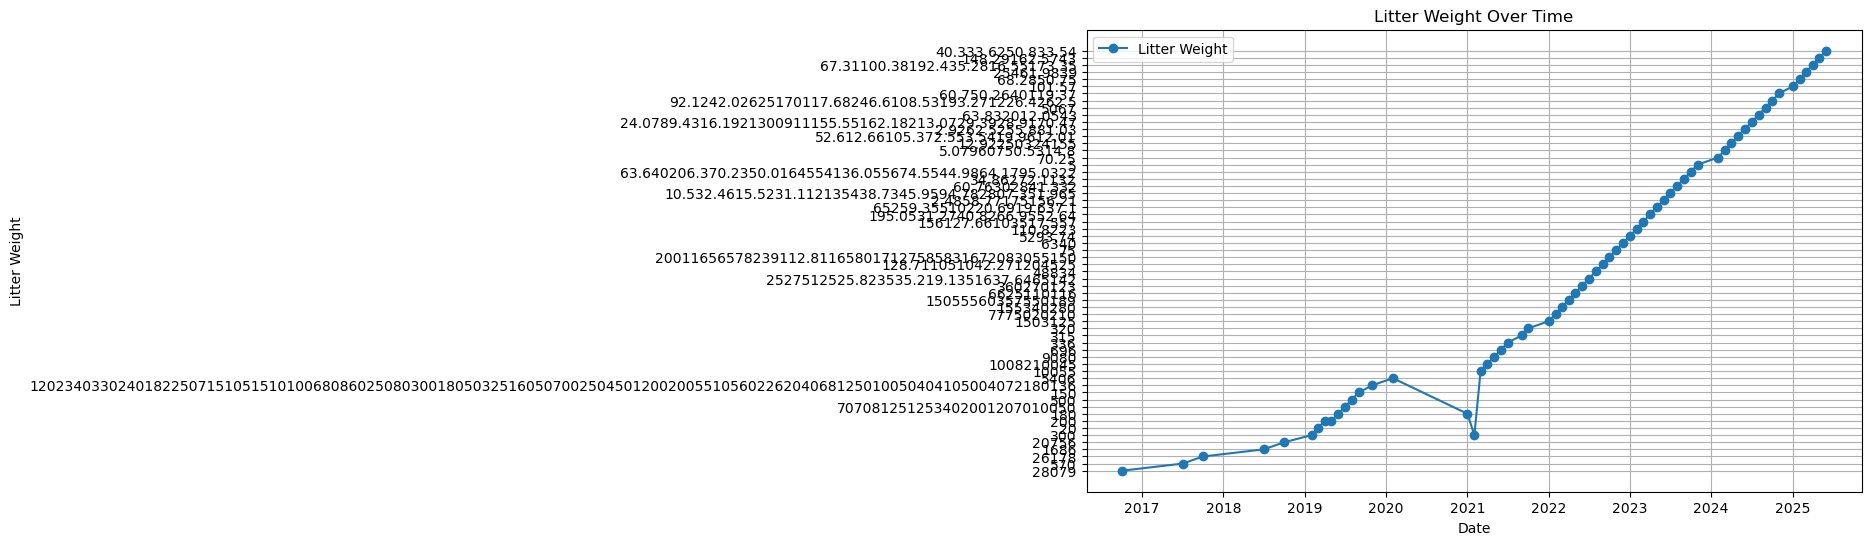

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [8]:
# First, import necessary libraries if not already imported
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Print column names to see what's available in the dataset
print("Column names in the dataset:", data.columns.tolist())

# Find the date column dynamically - look for columns that might contain date information
# This is a more robust approach than hardcoding a column name
possible_date_columns = [col for col in data.columns if any(date_term in col.lower() for date_term in ['date', 'time', 'day'])]
print("Possible date columns:", possible_date_columns)

# If possible date columns were found, use the first one, otherwise ask for manual input
if possible_date_columns:
    date_column = possible_date_columns[0]
    print(f"Using '{date_column}' as the date column")
else:
    # If no date column is found, you'll need to manually specify it based on the printed columns
    print("No date column found automatically. Please specify the date column name from the list above.")
    # For now, we'll use a placeholder - you should replace this with the actual column name
    date_column = data.columns[0]  # Using the first column as a fallback

# Convert date column to datetime format
data[date_column] = pd.to_datetime(data[date_column], errors='coerce')

# Check for NaT values after conversion
if data[date_column].isna().any():
    print(f"Warning: Some date values couldn't be converted to datetime format. Check the '{date_column}' column.")

# Sort by date
data = data.sort_values(by=date_column)

# Preview the data
print(data.head())

# Find the weight column dynamically
possible_weight_columns = [col for col in data.columns if any(weight_term in col.lower() for weight_term in ['weight', 'mass', 'kg', 'lb'])]
print("Possible weight columns:", possible_weight_columns)

# If possible weight columns were found, use the first one, otherwise ask for manual input
if possible_weight_columns:
    weight_column = possible_weight_columns[0]
    print(f"Using '{weight_column}' as the weight column")
else:
    # If no weight column is found, you'll need to manually specify it based on the printed columns
    print("No weight column found automatically. Please specify the weight column name from the list above.")
    # For now, we'll use a placeholder - you should replace this with the actual column name
    weight_column = data.columns[1]  # Using the second column as a fallback

# Aggregate by month
data['Month'] = data[date_column].dt.to_period('M')
monthly_data = data.groupby('Month')[weight_column].sum().reset_index()

# Convert 'Month' back to datetime for plotting
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()

print(monthly_data.head())

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'], monthly_data[weight_column], marker='o', label='Litter Weight')
plt.title('Litter Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Litter Weight')
plt.grid(True)
plt.legend()
plt.show()

# Extract x (time in numerical format) and y (litter weight)
x = (monthly_data['Month'] - monthly_data['Month'].min()).dt.days
y = monthly_data[weight_column]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

# Add trend line to the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'], y, marker='o', label='Litter Weight')
plt.plot(monthly_data['Month'], intercept + slope * x, color='red', label='Trend Line')
plt.title('Litter Weight with Trend Line')
plt.xlabel('Date')
plt.ylabel('Litter Weight')
plt.grid(True)
plt.legend()
plt.show()
